In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

Importing plotly failed. Interactive plots will not work.


In [4]:
df = pd.read_csv('ETFs/aadr.us.txt')
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-07-21,24.333,24.333,23.946,23.946,43321,0
1,2010-07-22,24.644,24.644,24.362,24.487,18031,0
2,2010-07-23,24.759,24.759,24.314,24.507,8897,0
3,2010-07-26,24.624,24.624,24.449,24.595,19443,0
4,2010-07-27,24.477,24.517,24.431,24.517,8456,0


In [9]:
df.rename(columns = {'Date' : 'ds', 'Close' : 'y'}, inplace=True)

In [10]:
df['ds'] = pd.to_datetime(df['ds'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ds       1565 non-null   datetime64[ns]
 1   Open     1565 non-null   float64       
 2   High     1565 non-null   float64       
 3   Low      1565 non-null   float64       
 4   y        1565 non-null   float64       
 5   Volume   1565 non-null   int64         
 6   OpenInt  1565 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 85.7 KB


In [15]:
df.head()

,ds,Open,High,Low,y,Volume,OpenInt
0,2010-07-21,24.333,24.333,23.946,23.946,43321,0
1,2010-07-22,24.644,24.644,24.362,24.487,18031,0
2,2010-07-23,24.759,24.759,24.314,24.507,8897,0
3,2010-07-26,24.624,24.624,24.449,24.595,19443,0
4,2010-07-27,24.477,24.517,24.431,24.517,8456,0


In [18]:
df.drop(df.columns[[1, 2, 3, 5, 6]], axis=1, inplace=True)

<AxesSubplot:>

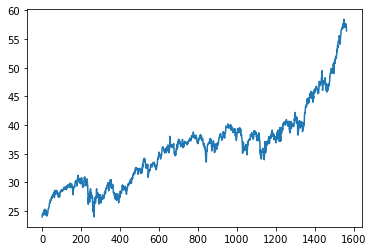

In [19]:
df['y'].plot()

In [21]:
while True:
    X = df['y'].values
    result = adfuller(X)
    if result[0] < result[4]['5%']:
        break
    else:
        df['y'] = df['y'] - df['y'].shift(1)
        df.dropna(axis=0, inplace=True)

<AxesSubplot:>

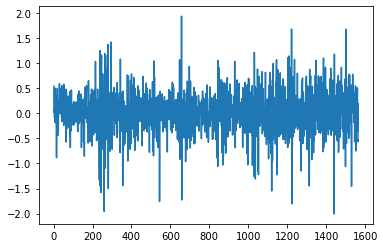

In [23]:
df['y'].plot()

In [24]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
future_days = model.make_future_dataframe(periods=365)
prediction = model.predict(future_days)

In [34]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1924,2018-11-06,0.132104,-0.566663,0.508447,0.131890,0.132321,-0.155887,-0.155887,-0.155887,-0.075164,-0.075164,-0.075164,-0.080723,-0.080723,-0.080723,0.0,0.0,0.0,-0.023783
1925,2018-11-07,0.132121,-0.547270,0.508101,0.131905,0.132339,-0.162390,-0.162390,-0.162390,-0.078767,-0.078767,-0.078767,-0.083624,-0.083624,-0.083624,0.0,0.0,0.0,-0.030270
1926,2018-11-08,0.132138,-0.608746,0.473721,0.131921,0.132357,-0.179656,-0.179656,-0.179656,-0.094879,-0.094879,-0.094879,-0.084778,-0.084778,-0.084778,0.0,0.0,0.0,-0.047519
1927,2018-11-09,0.132154,-0.570989,0.483089,0.131937,0.132376,-0.176525,-0.176525,-0.176525,-0.092323,-0.092323,-0.092323,-0.084203,-0.084203,-0.084203,0.0,0.0,0.0,-0.044371
1928,2018-11-10,0.132171,-0.252281,0.833204,0.131953,0.132395,0.140716,0.140716,0.140716,0.222675,0.222675,0.222675,-0.081958,-0.081958,-0.081958,0.0,0.0,0.0,0.272888


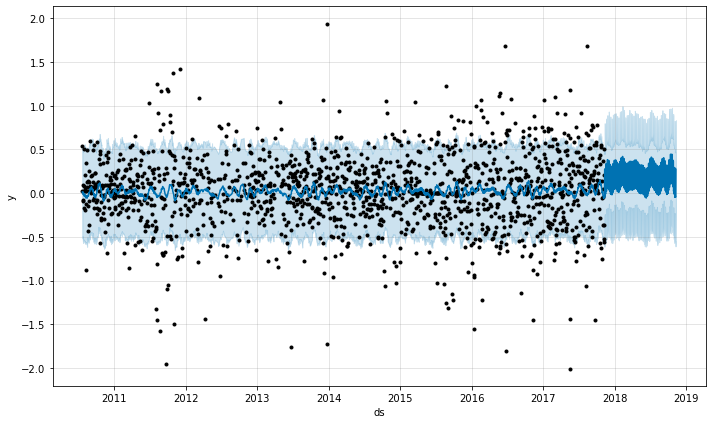

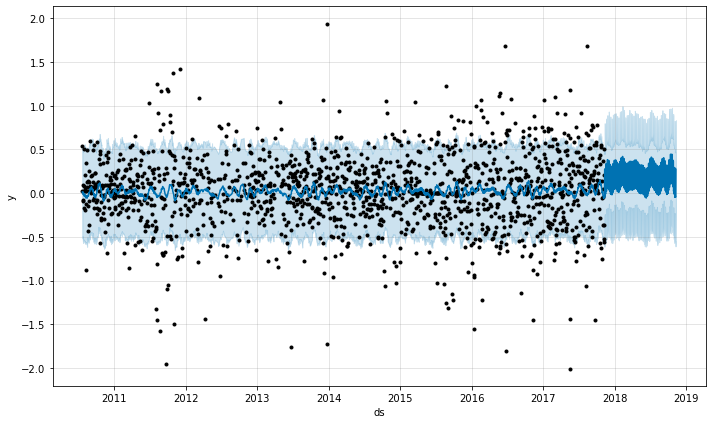

In [29]:
model.plot(prediction)

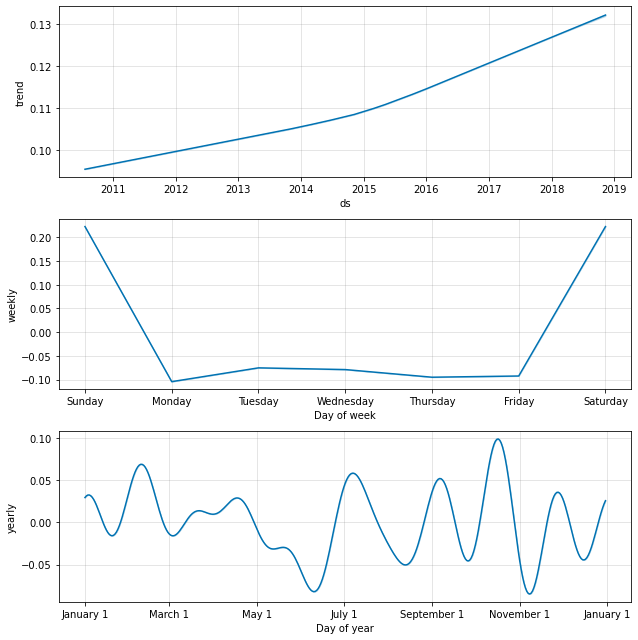

In [38]:
fig2 = model.plot_components(prediction)